In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import imageio

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
train_set_y.shape

(1, 209)

y = 0, it's a 'non-cat' picture.


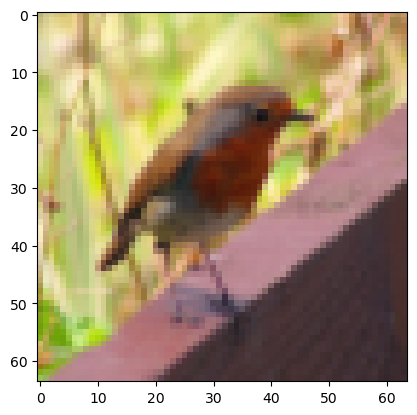

In [4]:
index = 10
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[0, index]) 
            + ", it's a '" 
            + classes[np.squeeze(train_set_y[:, index])]
            .decode("utf-8") + "' picture.")


In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px =train_set_x_orig.shape[1]

In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [7]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [12]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    Z = np.dot(w.T, X) + b # 1 * m
    A = sigmoid(Z) # 1 * m
    L = -((Y * np.log(A)) + ((1 - Y) * np.log(1 - A))) # 1 * m
    cost = (1 / m) * np.sum(L) # 1 * 1

    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
            "db": db}

    return grads, cost



In [13]:
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [14]:
def optimize(w, b, X, Y, num_interations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_interations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - np.multiply(learning_rate, dw)
        b = b - np.multiply(learning_rate, db)

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


In [15]:
params, grads, costs = optimize(w, b, X, Y, num_interations=100, learning_rate=0.009, print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


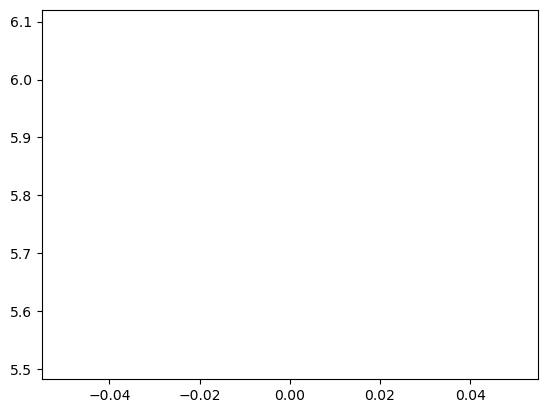

In [16]:
plt.plot(costs)

In [17]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b) # 1 * m
    
    Y_prediction = (A >= 0.5) * 1.0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [18]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [19]:
def model(X_train, Y_train, X_test, Y_test, num_interations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_interations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_interations}

    return d

In [20]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_interations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [21]:
test_set_y[0, 25]

1

y = 1, you predicted that it is a "cat" picture.


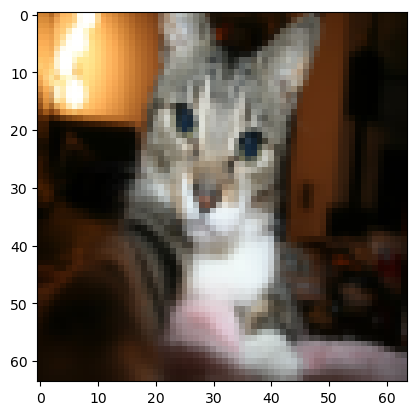

In [22]:
index = 25
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

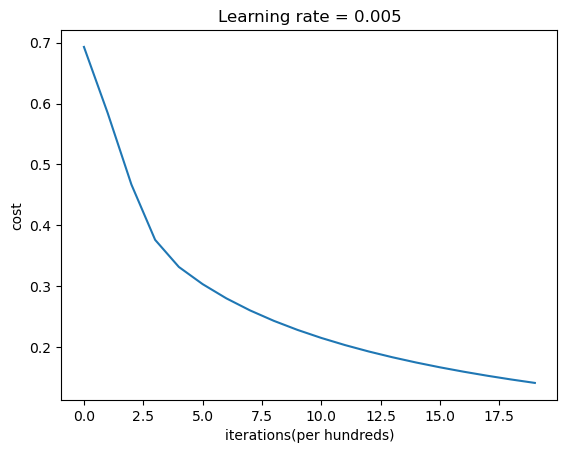

In [23]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

--------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

--------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

--------------------------------------------------------



<function matplotlib.pyplot.show(close=None, block=None)>

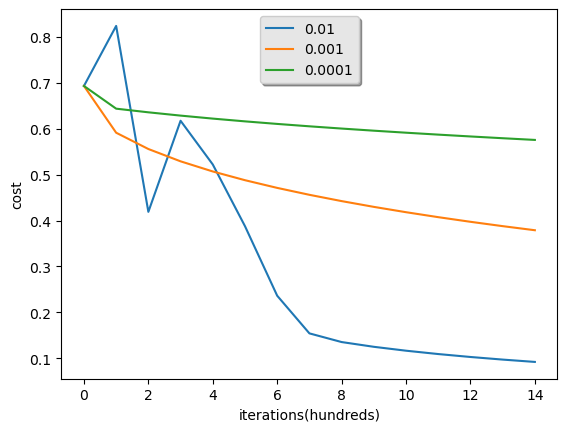

In [24]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_interations=1500, learning_rate=i, print_cost=False)
    print('\n' + "--------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations(hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show

In [25]:
train_set_x.shape

(12288, 209)

In [26]:
np.sqrt(12288 / 3)

64.0

C:\Users\tegua\AppData\Local\Temp\ipykernel_13660\2964054089.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(fname))


y = 0.0, your algorithm predicts a "non-cat" picture.


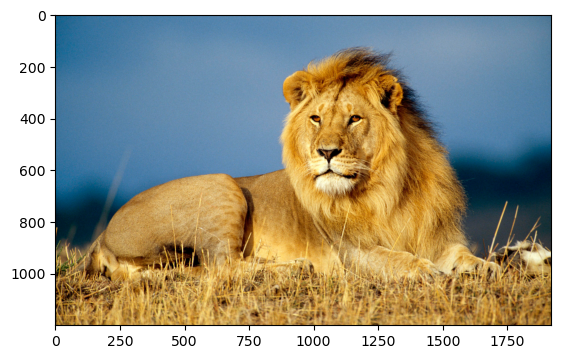

In [27]:
from skimage.transform import resize

my_image = "my_image4.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(imageio.imread(fname))
image = image/255.

my_image = resize(image, (num_px, num_px)).reshape((1, num_px*num_px*3)).T
# my_image = np.array(Image.fromarray(image).resize((num_px, num_px)))

# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) 
             + ", your algorithm predicts a \"" 
             + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")